In [67]:
import numpy as np
import pandas as pd
import matplotlib #
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
import sklearn #
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix
from sklearn.model_selection import KFold

In [69]:
print("Numpy: {}".format(np.__version__))
print("Pandas: {}".format(pd.__version__))
print("matplotlib: {}".format(matplotlib.__version__))
print("seaborn: {}".format(sns.__version__))
print("Scikit-Learn: {}".format(sklearn.__version__))

Numpy: 1.21.1
Pandas: 1.3.1
matplotlib: 3.4.2
seaborn: 0.11.1
Scikit-Learn: 0.24.2


In [70]:
data_path = "/home/tsv/mlops/v1mlops/v1mlops/data/raw/creditcard.csv"
df = pd.read_csv(data_path)

In [71]:
df = df.drop("Time", axis=1)

In [72]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [73]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [74]:
df.shape

(284807, 30)

In [75]:
normal = df[df.Class == 0].sample(frac=0.5, 
random_state=2020).reset_index(drop=True)
anomaly = df[df.Class == 1]

In [76]:
print(f"Normal: {normal.shape}")
print(f"Anomaly: {anomaly.shape}")

Normal: (142158, 30)
Anomaly: (492, 30)


In [77]:
normal_train, normal_test = train_test_split(normal, test_size = 0.2, random_state = 2020)

anomaly_train, anomaly_test = train_test_split(anomaly, test_size = 0.2, random_state = 2020)
normal_train, normal_validate = train_test_split(normal_train, test_size = 0.25, random_state = 2020)
anomaly_train, anomaly_validate = train_test_split(anomaly_train, test_size = 0.25, random_state = 2020)

In [78]:
x_train = pd.concat((normal_train, anomaly_train))
x_test = pd.concat((normal_test, anomaly_test))
x_validate = pd.concat((normal_validate, anomaly_validate))
y_train = np.array(x_train["Class"])
y_test = np.array(x_test["Class"])
y_validate = np.array(x_validate["Class"])

In [79]:
x_train = x_train.drop("Class", axis=1)
x_test = x_test.drop("Class", axis=1)
x_validate = x_validate.drop("Class", axis=1)

In [80]:
print("Training sets:\nx_train: {} \ny_train: {}".format(x_train.shape, y_train.shape))
print("\nTesting sets:\nx_test: {} \ny_test: {}".format(x_test.shape, y_test.shape))
print("\nValidation sets:\nx_validate: {} \ny_validate: {}".format(x_validate.shape, y_validate.shape))

Training sets:
x_train: (85588, 29) 
y_train: (85588,)

Testing sets:
x_test: (28531, 29) 
y_test: (28531,)

Validation sets:
x_validate: (28531, 29) 
y_validate: (28531,)


In [81]:
scaler = StandardScaler()
scaler.fit(pd.concat((normal, anomaly)).drop("Class", axis=1))
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_validate = scaler.transform(x_validate)

In [82]:
def train(sk_model, x_train, y_train):
    sk_model = sk_model.fit(x_train, y_train)
    train_acc = sk_model.score(x_train, y_train)
    print(f"Train Accuracy: {train_acc:.3%}")

In [83]:
def evaluate(sk_model, x_test, y_test):
    
    eval_acc = sk_model.score(x_test, y_test)
    preds = sk_model.predict(x_test)
    auc_score = roc_auc_score(y_test, preds)
    print(f"Auc Score: {auc_score:.3%}")
    print(f"Eval Accuracy: {eval_acc:.3%}")
    roc_plot = plot_roc_curve(sk_model, x_test, y_test, name='Scikit-learn ROC Curve')
    plt.savefig("/home/tsv/mlops/v1mlops/v1mlops/reports/figures/sklearn_roc_plot.png")
    plt.show()
    plt.clf()
    conf_matrix = confusion_matrix(y_test, preds)
    ax = sns.heatmap(conf_matrix, annot=True,fmt='g')
    ax.invert_xaxis()
    ax.invert_yaxis()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title("Confusion Matrix")
    plt.savefig("/home/tsv/mlops/v1mlops/v1mlops/reports/figures/sklearn_conf_matrix.png")

Train Accuracy: 99.893%
Auc Score: 85.341%
Eval Accuracy: 99.874%


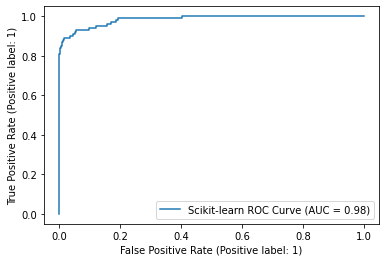

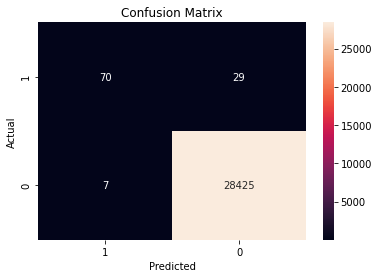

In [84]:
sk_model = LogisticRegression(random_state=None, max_iter=70, solver='lbfgs')

train(sk_model, x_train, y_train)
evaluate(sk_model, x_test, y_test)


In [85]:
sk_model.score(x_test, y_test)

0.9987382145736217

In [86]:
import pickle
modelfilename = '/home/tsv/mlops/v1mlops/v1mlops/models/my_model1.sav'
pickle.dump(sk_model, open(modelfilename, 'wb'))

In [87]:
loaded_model = pickle.load(open(modelfilename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9987382145736217


In [88]:
anomaly_weights = [50, 100, 150, 200]
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=2021)

In [89]:
logs = []
for f in range(len(anomaly_weights)):
    fold = 1
    accuracies = []
    auc_scores= []
    for train, test in kfold.split(x_validate, y_validate):
        weight = anomaly_weights[f]
        class_weights= {
            0: 1,
            1: weight
        }

        sk_model = LogisticRegression(random_state=None,
                                        max_iter=500, solver='lbfgs',
                                        class_weight=class_weights).fit(x_validate[train], y_validate[train])

        for h in range(40): print('-', end="")
        print(f"\nfold {fold}\nAnomaly Weight: {weight}")

        train_acc = sk_model.score(x_validate[train], y_validate[train])
        eval_acc = sk_model.score(x_validate[test], y_validate[test])
        preds = sk_model.predict(x_validate[test])

        try:
            auc_score = roc_auc_score(y_validate[test], preds)
        except:
            auc_score = -1

        print("AUC: {}\neval_acc: {}".format(auc_score, eval_acc))

        accuracies.append(eval_acc)
        auc_scores.append(auc_score)

        log = [sk_model, x_validate[test], y_validate[test], preds]
        logs.append(log)

        fold = fold + 1

    print("\nAverages: ")
    print("Accuracy: ", np.mean(accuracies))
    print("AUC: ", np.mean(auc_scores))

    print("Best: ")
    print("Accuracy: ", np.max(accuracies))
    print("AUC: ", np.max(auc_scores))

----------------------------------------
fold 1
Anomaly Weight: 50
AUC: 0.9676884110410421
eval_acc: 0.9940424040651831
----------------------------------------
fold 2
Anomaly Weight: 50
AUC: 0.9069797197876017
eval_acc: 0.99509288468279
----------------------------------------
fold 3
Anomaly Weight: 50
AUC: 0.8970981357720718
eval_acc: 0.993515597616544
----------------------------------------
fold 4
Anomaly Weight: 50
AUC: 0.8780500062821963
eval_acc: 0.9933403434980722
----------------------------------------
fold 5
Anomaly Weight: 50
AUC: 0.9449945859902086
eval_acc: 0.9949176305643183

Averages: 
Accuracy:  0.9941817720853816
AUC:  0.918962171774624
Best: 
Accuracy:  0.99509288468279
AUC:  0.9676884110410421
----------------------------------------
fold 1
Anomaly Weight: 100
AUC: 0.9658430683345394
eval_acc: 0.9903627124583845
----------------------------------------
fold 2
Anomaly Weight: 100
AUC: 0.92706800588574
eval_acc: 0.9900105152471083
-------------------------------------